<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Parcial 02 - IA**

## **Outline**

1. [Ejercicio 1. Clasificación](#eje1)
2. [Ejercicio 2. Regresión](#eje2)
3. [Ejercicio 3. LeaveOneOut](#eje3)
4. [Ejercicio 4. DNN](#eje4)

In [1]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ai-q02/')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Mounted at /content/drive
/content/drive/My Drive/ai-q02


---
#### - Usted debe ejecutar **TODAS** las celdas de tipo **CODE**. De lo contrario, sus respuestas no serán procesadas correctamente.

#### - Para este notebook es recomendable usar la **GPU**. Por favor verifique que esté habilitada la GPU en `Editar -> Configuración del notebook -> Acelerador de hardware (Opción GPU)`
---

## **Wine recognition dataset**

Vamos a explorar un dataset que contiene los datos de 178 vinos de diferentes cultivadores ubicados en Italia. Para cada vino se reportan 13 características químicas calculadas mediante un análisis de laboratorio, como: alcohol, intensidad de color, poline, entre muchos otros. Adicionalmente, se proporcionan las etiquetas para cada vino. Este dataset contiene en total 3 tipos de vino, codificados como clases '0', '1' y '2'.

[Fuente](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset)

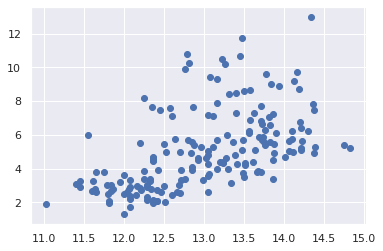

In [7]:
#@title **Wine recognition**
variable_x = "Alcohol" #@param {type:"string"}
variable_y = "Color intensity" #@param {type:"string"}

cols = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash",
        "Magnesium", "Total phenols", "Flavanoids", 
        "Nonflavanoid phenols", "Proanthocyanins", 
        "Color intensity", "Hue", 
        "OD280/OD315 of diluted wines", "Proline"]
        
vx = cols.index(variable_x)
vy = cols.index(variable_y)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.datasets import load_wine

X,y = load_wine(return_X_y=True)

plt.scatter(X[:,vx], X[:,vy])

#print(d.shape)
#d.head(2)

# **Ejercicio 1. Clasificación**  <a name="eje1"></a>

Implemente la clasificación de tipos de vinos. Para ello vamos a seguir dos pasos. 
1. Selección de las mejores caracteristicas, usando un _Decision Tree Classifier_
2. Con las mejores caracteristicas, entrenamos un nuevo clasificador para obtener el resultado.

Para ellos, creamos una función que: 

- Reciba el `x_train`,`x_test`,`y_train`, `y_test` y el número de mejores características `n` que se van a utilizar.

- Entrene un clasificador `DecisionTreeClassifier` como estimador con parámetros `max_depth=50` y `criterion="gini"`. Con esta configuración estime las mejores características mediante el uso de `feature_importances_`

- Utilice las mejores `n` caracteristicas para entrenar  un **nuevo** `DecisionTreeClassifier` como estimador con parámetros `max_depth=50` y `criterion="gini"`.

- Retorne la clasificación obtenida en **test** como`score1` y `score2` para el primer y segundo `DecisionTreeClassifier`, respectivamente.

<b>Referencia Decision Tree Classifier:</b> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html




In [64]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas
def fun_21020521(X_train, X_test, y_train, y_test, n):
    import numpy as np
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import make_scorer
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import mean_squared_error
    np.random.seed(23)

    est1 = DecisionTreeClassifier(max_depth=50, criterion="gini")
    est1.fit(X_train,y_train)
    p = est1.predict(X_test)
    score1 = accuracy_score(y_test, p)

    X_train_best = est1.feature_importances_
    X_test_best = est1.feature_importances_

    est2 = DecisionTreeClassifier(max_depth=50, criterion="gini")
    est2.fit(X_train,y_train)
    p = est2.predict(X_test)
    score2 = accuracy_score(y_test, p)
    print(score1, score2)
    return score1, score2

import urllib.parse, inspect
src21020521 = urllib.parse.quote_plus(inspect.getsource(fun_21020521))

In [65]:
#@title **verifique su respuesta**
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X,y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

numbestfeat = 6
score1, score2 = fun_21020521(X_train, X_test, y_train, y_test, numbestfeat)


0.8888888888888888 0.8148148148148148


In [66]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ2_21020521 $src21020521

0.8888888888888888 0.8518518518518519
0.8888888888888888 0.8888888888888888
evaluation result CORRECT


# **Ejercicio 2. Regresión**  <a name="eje2"></a>

Vamos a hacer una función que explore el parametro `kernel` del **regresor `SVR`** para el dataset de los tipos de vino, realizando lo siguiente: 

- Utilizar las características: `Alcohol`, `Malic acid`, `Ash`, `Alcalinity of ash`, `Magnesium`, `Total phenols`, `Flavanoids`, `Nonflavanoid phenols`, `Proanthocyanins`, `Hue`, `OD280/OD315 of diluted wines`, `Proline`.

- La característica `Color intensity` será el objetivo de la regresión

- El 70% del dataset se utilizará como train `X_train`, `y_train`

- El 30% del dataset restante se utilizará como test: `X_test`, `y_test`

- Usando el parámetro `kernel` realice una exploración para los valores: `'linear'`, `'poly'`, `'rbf'`

- Devuelva **una lista** `scores` con el valor del **mean squared error (MSE)** para cada uno de los kernels.

- Posteriormente, utilice **solamente** la característica: `Alcohol`.<br>De nuevo, realice la exploración para los valores de kernel: `'linear'`, `'poly'`, `'rbf'`.

- Devuelva **una lista** `scores2` con el valor del **mean squared error (MSE)** para cada uno de los kernels.

- Devuelva **una lista** `predictions` con las **predicciones** para cada uno de los kernels.

- Devuelva los datos de test `X_test` y las etiquetas `y_test`


<b>Referencia Support Vector Regression:</b> https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [19]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas

def fun_22020521(data, y):
    from sklearn.svm import SVR
    from sklearn.metrics import mean_squared_error
    import numpy as np
    import pandas as pd
    np.random.seed(23)
    size = data.shape[0]
    n = int(size*0.7)
    
    X_train = data[:n, [0,1,2,3,4,5,6,7,8,10,11,12]]
    y_train = data[:n, 9]
    X_test =  data[n:, [0,1,2,3,4,5,6,7,8,10,11,12]]
    y_test =  data[n:, 9]

    kernels = ['linear', 'poly', 'rbf']
    scores = []
    scores2 = []
    predictions = []

    for i in kernels:
      est = SVR(kernel=i)
      est.fit(X_train, y_train.ravel())
      p = est.predict(X_test)
      scores.append(mean_squared_error(y_test, p))
    
    X_train = data[:n, 0].reshape(-1,1)
    X_test =  data[n:, 0].reshape(-1,1)

    for i in kernels:
      est = SVR(kernel=i)
      est.fit(X_train, y_train.ravel())
      p = est.predict(X_test)
      predictions.append(p)
      scores2.append(mean_squared_error(y_test, p))
        
    return scores, scores2, predictions, X_test, y_test

import urllib.parse, inspect
src22020521 = urllib.parse.quote_plus(inspect.getsource(fun_22020521))

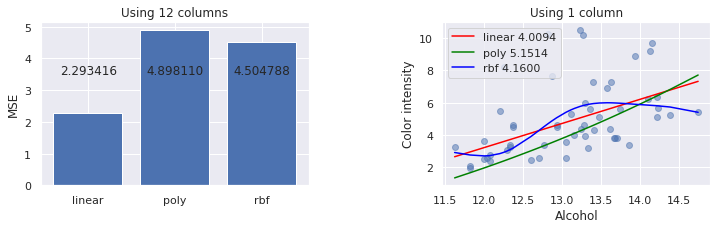

In [15]:
#@title **verifique su respuesta**
import numpy as np
from sklearn.datasets import load_wine
from sklearn.utils import shuffle

X,y = load_wine(return_X_y=True)

vals, y = shuffle(X, y)
scores, scores2, predictions, x, y = fun_22020521(vals, y)

y_ord = []

x_ord = np.sort(x,axis=0)
y_ord.append(predictions[0][np.argsort(x, axis=0)])
y_ord.append(predictions[1][np.argsort(x, axis=0)])
y_ord.append(predictions[2][np.argsort(x, axis=0)])

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.set_title('Using 12 columns')
ax1.bar(range(0,len(scores)), scores)
ax1.set_xticks(range(0,len(scores)))
ax1.set_xticklabels(('linear', 'poly', 'rbf'))
ax1.set_ylabel('MSE')
ax1.text(-0.32, 3.5, str(scores[0])[:8])
ax1.text(0.68, 3.5, str(scores[1])[:8])
ax1.text(1.68, 3.5, str(scores[2])[:8])

ax2 = f.add_subplot(122)
ax2.set_title('Using 1 column')
ax2.plot(x_ord,y_ord[0], c='red', linewidth=1.5, label='linear '+str(scores2[0])[:6])
ax2.plot(x_ord,y_ord[1], c='green', linewidth=1.5, label='poly '+str(scores2[1])[:6])
ax2.plot(x_ord,y_ord[2], c='blue', linewidth=1.5, label='rbf '+str(scores2[2])[:6])
ax2.scatter(x,y,alpha=0.5)
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Color intensity')
ax2.legend()

In [20]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ2_22020521 $src22020521

[1.6092521173004586, 4.058480956798117, 3.7197647533530054] [1.6092521173004586, 4.058480956798117, 3.7197647533530054]
[2.9746739490661382, 3.7646083175494787, 2.847205918045639] [2.9746739490661382, 3.7646083175494787, 2.847205918045639]
evaluation result CORRECT


# **Ejercicio 3. LeaveOneOut**  <a name="eje3"></a>

El dataset de los tipos de vino presenta relativamente pocos ejemplos, por lo que una partición grande para el test puede incurrir en un aprendizaje debil (pocos datos de entrenamiento). Vamos a implementar una función que realice un esquema de validación **leave-one-out**, por lo tanto desarrolle una función que: 

- Utilice la clase `LeaveOneOut` de sklearn y devuelva el número de splits `ns`

- Como clasificadores utilice:
 - Un `RandomForestClassifier` con el parámetro `n_estimators=50`
 - Un `SVC` con el parámetro `kernel='linear'`

- Obtenga el puntaje **promedio** para ambos estimadores y devuélvalo como `score1` y `score2`

<b>Referencia Leave One Out:</b> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

In [32]:
#@title **2172969**
#@ markdown No modifique las dos últimas lineas

def fun_23020521(data, y):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import LeaveOneOut
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    np.random.seed(23)

    rfc = RandomForestClassifier(n_estimators=50)
    svc = SVC(kernel='linear')
    LOO = LeaveOneOut()

    score1 = []
    score2 = []

    for train_index, test_index in LOO.split(data):
      X_train, X_test = data[train_index], data[test_index]
      y_train, y_test = y[train_index], y[test_index]
      rfc.fit(X_train,y_train)
      svc.fit(X_train,y_train)
      score1.append(accuracy_score(y_train,rfc.predict(X_train)))
      score2.append(accuracy_score(y_test,svc.predict(X_test)))
  
    ns = LOO.get_n_splits(data)
 
    return ns, np.mean(score1), np.mean(score2)

import urllib.parse, inspect
src23020521 = urllib.parse.quote_plus(inspect.getsource(fun_23020521))

Text(0.78, 0.8, '0.955056')

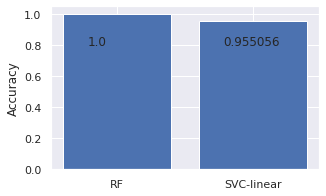

In [53]:
#@title **verifique su respuesta**
import numpy as np
from sklearn.datasets import load_wine
from sklearn.utils import shuffle
import matplotlib as mp

X,y = load_wine(return_X_y=True)

vals, y = shuffle(X, y)

ns, score1, score2 = fun_23020521(vals, y)

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.bar([0,1], [score1,score2])
ax1.set_xticks(range(0,2))
ax1.set_xticklabels(('RF', 'SVC-linear'))
ax1.set_ylabel('Accuracy')
ax1.text(-0.22, 0.8, str(score1)[:8])
ax1.text(0.78, 0.8, str(score2)[:8])


In [33]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ2_23020521 $src23020521

evaluation result CORRECT


# **Ejercicio 4. DNN**  <a name="eje4"></a>


El MNIST es hoy en dia un estándar para proponer datasets en el contexto de _machine learning_ y _deep learning_. En este punto vamos a cargar el dataset Fashion-MNIST que esta dispuesto en la libreria de tf.keras (`load_data()`). Escriba una función entonces que: 

- Utilice las particiones de entrenamiento y test propuestas por el dataset original. 

- Haga una red DNN, que reciba como entrada las muestras del dataset y tenga como salida el número relacionado con las clases del dataset. 

- Además debe tener dos capas intermedias con 512 y 128 neuronas, y activaciones `relu`

- Entrene el modelo con la configuración: epochs=5, batch_size=64

- La función debe devolver el modelo `DNN` y el resultado `score_DNN`, el tamaño del dataset en test. 







In [55]:
#@title **2172969**
#@ markdown No modifique las dos últimas lineas

def fun_24020521():
  import numpy as np
  import tensorflow as tf
  from tensorflow import keras
  from sklearn.metrics import accuracy_score
  tf.random.set_seed(23)
  np.random.seed(23)

  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
  print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
  x_train = x_train.reshape([-1, 28, 28, 1])
  x_test = x_test.reshape([-1, 28, 28, 1])

  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')

  x_train /= 255
  x_test /= 255

  model = tf.keras.Sequential([tf.keras.layers.Flatten( input_shape=[28, 28, 1]),
                               tf.keras.layers.Dense(512, activation=tf.nn.relu),
                               tf.keras.layers.Dense(128, activation=tf.nn.relu),
                               tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

  model.compile(optimizer=tf.keras.optimizers.SGD(), 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  model.fit( x_train, y_train, epochs=5, batch_size=64)
  
  pre = model.predict(x_test)
  l, score_DNN = model.evaluate(x_test, y_test)

  return model, score_DNN,  x_test.shape

import urllib.parse, inspect
src24020521 = urllib.parse.quote_plus(inspect.getsource(fun_24020521))

In [52]:
#@title **verifique su respuesta**
model, score_DNN,  shape_test = fun_24020521()
print("el accuracy obtenido es: ", score_DNN)
print("el tamaño en test es: ", shape_test)
print("FELICITACIONES!, durante un parcial logró clasificar correctamente: ", score_DNN*shape_test[0], "imagenes reales")


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 1.0974 - accuracy: 0.6718
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.5359 - accuracy: 0.8197
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4795 - accuracy: 0.8339
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4501 - accuracy: 0.8430
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4461 - accuracy: 0.8437
el accuracy obtenido es:  0.8436999917030334
el tamaño en test es:  (10000, 28, 28, 1)
FELICITACIONES!, durante un parcial logró clasificar correctamente:  8436.999917030334 imagenes reales


In [38]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ2_24020521 $src24020521


2021-02-06 20:12:33.162562: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
2021-02-06 20:12:35.212324: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-06 20:12:35.213250: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-06 20:12:35.217568: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-02-06 20:12:35.218089: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2021-02-06 20:12:35.218126: I ten

# **Pasos Finales.**



#### 1. Reemplace la variable con su código de estudiante

In [ ]:
#@title **1. Complete la siguiente información:**
taller_name = "quiz02" #@param {type:"string"}
codigo_name = "q02_12345" #@param {type:"string"}


import urllib.parse, inspect
taller = urllib.parse.quote_plus(taller_name)
codigo = urllib.parse.quote_plus(codigo_name)

print(taller, codigo)

Taller_prof_02_20202 tl2_12345


In [ ]:
#@title **2. Guarde los cambios del taller**
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [ ]:
#@title **3. Ejecute la siguiente celda y envíe el archivo**
!./convert_ipynb.sh $codigo $taller

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>